# Decision Tree

Realizando os imports e inicializando o dataframe com o arquivo CSV

In [1]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import pandas as pd
CSV_FULL_PATH = '../CSVs/pokemon.csv'

data_pandas = pd.read_csv(CSV_FULL_PATH)
df = pd.DataFrame(data_pandas)

x = df.drop(['is_legendary', 'name'], axis=1)
y = df['is_legendary']

## Treinando o modelo e testando a acurácia
Primeiro dividimos o dataset em treino e teste. Depois geramos o modelo de árvore de decisão e treinamos com o dataset de treino. Por fim, fazemos as predições com o dataset de teste e calculamos a acurácia.

In [2]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

model = DecisionTreeClassifier(random_state=1)
model.fit(x_train, y_train) # Aplicamos no modelo os dados de treino

y_pred = model.predict(x_test) # Fazemos as predições com os dados de teste
print('Acurácia: {}%'.format(accuracy_score(y_test, y_pred) * 100))
recall = confusion_matrix(y_test, y_pred)[1][1] / (
            confusion_matrix(y_test, y_pred)[1][1] + confusion_matrix(y_test, y_pred)[1][0])
f1 = 2 * (recall * accuracy_score(y_test, y_pred)) / (recall + accuracy_score(y_test, y_pred))
precision = confusion_matrix(y_test, y_pred)[1][1] / (
            confusion_matrix(y_test, y_pred)[1][1] + confusion_matrix(y_test, y_pred)[0][1])
print('Recall: {}%'.format(recall * 100))
print('F1: {}%'.format(f1 * 100))
print('Precisão: {}%'.format(precision * 100))

Acurácia: 98.00995024875621%
Recall: 78.94736842105263%
F1: 87.45190884877182%
Precisão: 100.0%


## Matriz de confusão

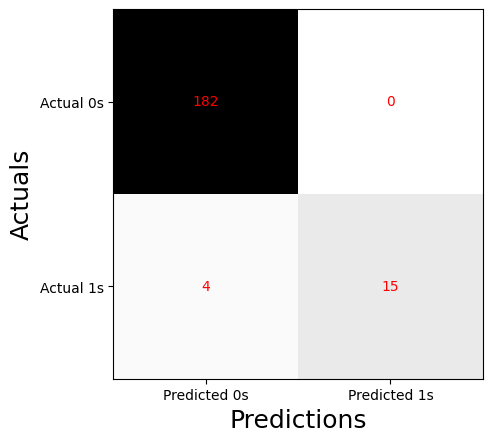

In [3]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), cmap='binary')
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
for t in ax.texts: t.set_color('red')
plt.show()

## Visualizando a árvore de decisão

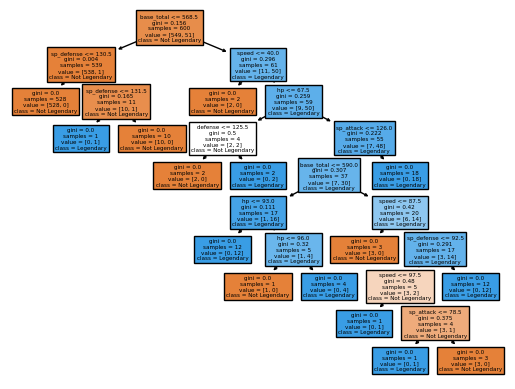

Feature ranking:
1. Feature base_total (0.796849)
2. Feature speed (0.076475)
3. Feature sp_defense (0.048617)
4. Feature hp (0.031270)
5. Feature sp_attack (0.025360)
6. Feature defense (0.021429)
7. Feature attack (0.000000)


<Figure size 640x480 with 0 Axes>

In [4]:
import numpy as np

tree.plot_tree(model,
               feature_names=x.columns,
               class_names=['Not Legendary', 'Legendary'],
               filled=True)
plt.show()
plt.clf()

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(x.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, x.columns[indices[f]], importances[indices[f]]))

## Analisando as predições

In [5]:
leg_pred_as_leg = []
leg_pred_as_not_leg = []
not_leg_pred_as_leg = []
for i in range(len(y_pred)):
    if y_pred[i] == 1 and y_test.iloc[i] == 1:
        leg_pred_as_leg.append(df.loc[x_test.index[i], 'name'])
    elif y_pred[i] == 0 and y_test.iloc[i] == 1:
        leg_pred_as_not_leg.append(df.loc[x_test.index[i], 'name'])
    elif y_pred[i] == 1 and y_test.iloc[i] == 0:
        not_leg_pred_as_leg.append(df.loc[x_test.index[i], 'name'])
leg_df = pd.DataFrame({'Pokemon': leg_pred_as_leg, 'Predicted': 'Legendary', 'Actual': 'Legendary'})
not_leg_df = pd.DataFrame({'Pokemon': leg_pred_as_not_leg, 'Predicted': 'Not Legendary', 'Actual': 'Legendary'})
not_leg_pred_as_leg_df = pd.DataFrame(
    {'Pokemon': not_leg_pred_as_leg, 'Predicted': 'Legendary', 'Actual': 'Not Legendary'})
df = pd.concat([leg_df, not_leg_df, not_leg_pred_as_leg_df])
df

,Pokemon,Predicted,Actual
0,Raikou,Legendary,Legendary
1,Tornadus,Legendary,Legendary
2,Zygarde,Legendary,Legendary
3,Landorus,Legendary,Legendary
4,Lugia,Legendary,Legendary
5,Hoopa,Legendary,Legendary
6,Mesprit,Legendary,Legendary
7,Victini,Legendary,Legendary
8,Groudon,Legendary,Legendary
9,Uxie,Legendary,Legendary
